# Run the hand-made Perceptron class
------
### Import basic needed modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

---
### Load and setup data/variables 
1\. Input Iris.data (.CSV) with *pandas* to be a dataframe (df), and set the columns' name.

In [2]:
df = pd.read_csv('iris.data', header=None)
df.columns = ['sepal_length', 'x_1', 'petal_length', 'x_3', 'type']
#print df.tail()
df.iloc[45:55]

,sepal_length,x_1,petal_length,x_3,type
45,4.8,3.0,1.4,0.3,Iris-setosa
46,5.1,3.8,1.6,0.2,Iris-setosa
47,4.6,3.2,1.4,0.2,Iris-setosa
48,5.3,3.7,1.5,0.2,Iris-setosa
49,5.0,3.3,1.4,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor


2\. Extract 100 data from dataframe df 
* No.4 colume to y
* No.0 & 2 columes to be X, with 2-D variables 

In [3]:
# Filling y and X
y = df.iloc[0:100, 4].values
X = df.iloc[0:100, [0,2]].values
X.shape
#print ("y :", y)
#print ("X :", X)

(100, 2)

3\. Change the text to distigushable real rumber in y

In [4]:
y = np.where(y == 'Iris-setosa', -1, 1)

4\. Visualize the current distrubtion from data

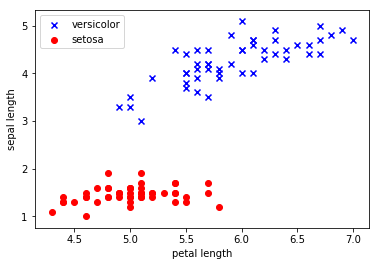

In [5]:
# Ploting : significance variables
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

---
### Run hand-made Perceptron
1\. Import hand-made Perceptron class

In [6]:
from Perceptron import Perceptron

2\. Running percepton algorithm with 10 times iterations....

In [7]:
# Percpetron setting
ppn_10 = Perceptron(eta=0.1, n_iter=10)
ppn_10.fit(X,y)

3\. Finished and visualizing the misclassifications as function of iterations

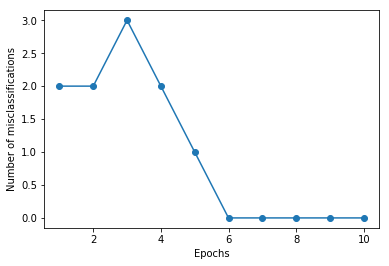

In [8]:
# Plotting
plt.plot
plt.plot(range(1, len(ppn_10.errors_) + 1), ppn_10.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [9]:
print 'weight w: '+str(ppn_10.w_)
print 'Activation function: %.2f + %.2f*x_1 + %.2f*x_2'%(ppn_10.w_[0], ppn_10.w_[1], ppn_10.w_[2])

weight w: [-0.4  -0.68  1.82]
Activation function: -0.40 + -0.68*x_1 + 1.82*x_2


---
### Visualize decision regions
Import hand-made funciton & plot

In [10]:
from plot_decision_regions import * 
plot_decision_regions( X, y, classifier=ppn_10, resolution=0.01 )
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
#plt.show()

In [11]:
x = np.arange(0., 8., 0.1)
c0 = -1*ppn_10.w_[0]/ppn_10.w_[2]
c1 = -1*ppn_10.w_[1]/ppn_10.w_[2]

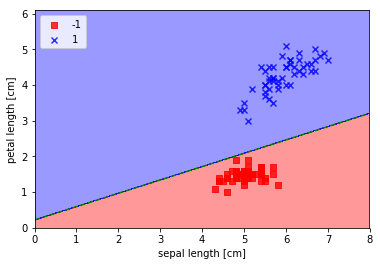

Green line : y = 0.22 + 0.37*x = 0
Blue y > 0, red y < 0


In [12]:
plt.plot(x, c0+c1*x, 'g--')
plt.show()
print 'Green line : y = %.2f + %.2f*x = 0'%(c0, c1)
print 'Blue y > 0, red y < 0'

---
# Summary and observing evelotion of iteration
1\. Create each iterations' classifiers

In [13]:
#plt.figure(1)
eta=0.1
ppn = []
for i in range(10):
    ppn.append(Perceptron(eta=eta, n_iter=i+1))
    ppn[i].fit(X,y)
    
    #plt.subplot(2, 5, i+1)
    #plot_decision_regions( X, y, classifier=ppn[i] )
    #plt.xlabel('sepal length [cm]')
    #plt.ylabel('petal length [cm]')
    #plt.legend(loc='upper left')
#plt.show()

2\. define a function for plots

In [14]:
def plot_iter(n_iter):
    n_misc = ppn[n_iter-1].checkMisclassified(X, y)
    print 'weight :'+str(ppn[n_iter-1].w_)
    print 'misclass (online): '+str(ppn[n_iter-1].errors_[n_iter-1])
    print 'misclass (test)  : '+str(n_misc)
    #print ppn[n_iter-1].misc # optional
    plot_decision_regions( X, y, classifier=ppn[n_iter-1] )
    plt.xlabel('sepal length [cm]')
    plt.ylabel('petal length [cm]')
    plt.legend(loc='upper left', title='Iter '+str(n_iter))
    plt.show()

weight :[ 0.    0.38  0.66]
misclass (online): 2
misclass (test)  : 50


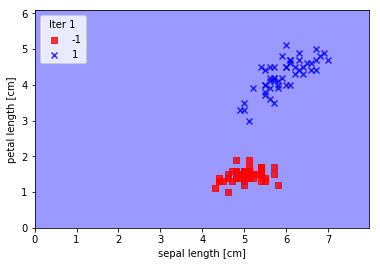

In [15]:
plot_iter(1)

weight :[ 0.    0.76  1.32]
misclass (online): 2
misclass (test)  : 50


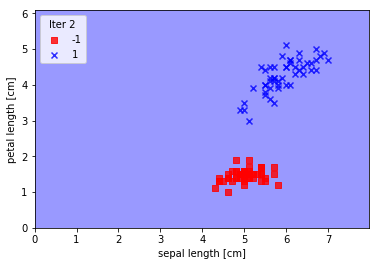

In [16]:
plot_iter(2)

weight :[-0.2   0.22  1.68]
misclass (online): 3
misclass (test)  : 50


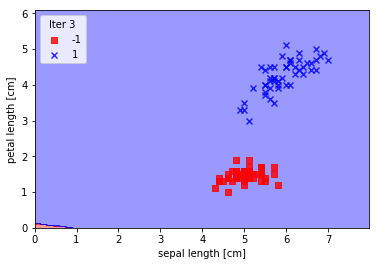

In [17]:
plot_iter(3)

weight :[-0.2   0.34  2.1 ]
misclass (online): 2
misclass (test)  : 50


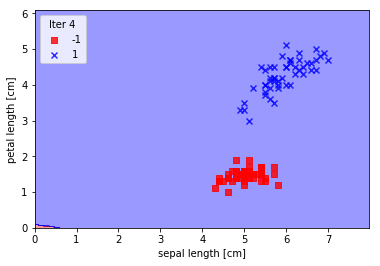

In [18]:
plot_iter(4)

weight :[-0.4  -0.68  1.82]
misclass (online): 1
misclass (test)  : 0


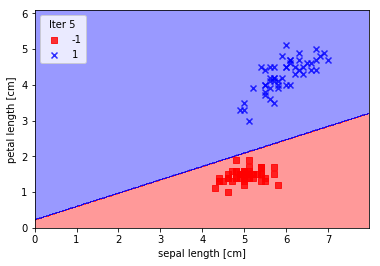

In [19]:
plot_iter(5)

weight :[-0.4  -0.68  1.82]
misclass (online): 0
misclass (test)  : 0


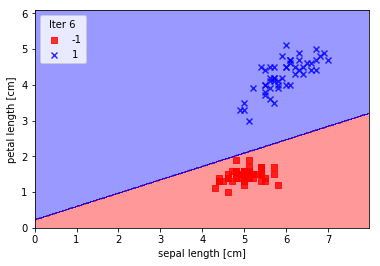

In [20]:
plot_iter(6)

weight :[-0.4  -0.68  1.82]
misclass (online): 0
misclass (test)  : 0


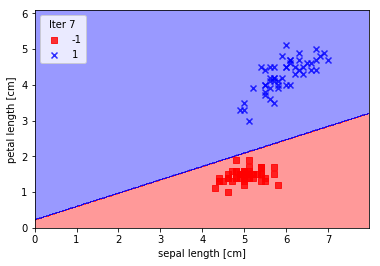

In [21]:
plot_iter(7)

weight :[-0.4  -0.68  1.82]
misclass (online): 0
misclass (test)  : 0


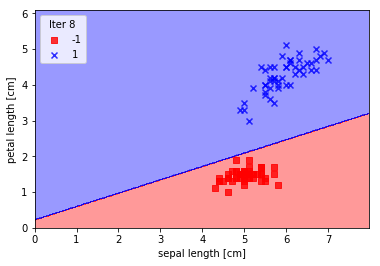

In [22]:
plot_iter(8)

weight :[-0.4  -0.68  1.82]
misclass (online): 0
misclass (test)  : 0


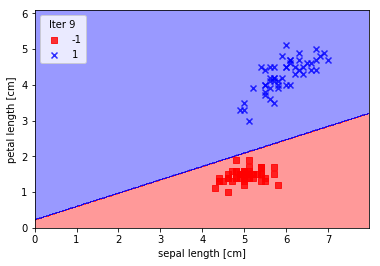

In [23]:
plot_iter(9)

weight :[-0.4  -0.68  1.82]
misclass (online): 0
misclass (test)  : 0


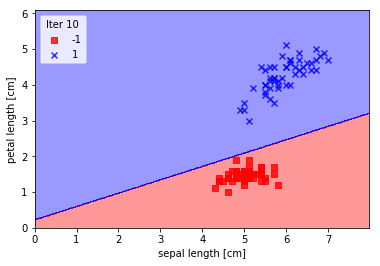

In [24]:
plot_iter(10)

### Conclusion 
The order of data in dataframe can affect the learning. In our case, the first 50 data are *Iris-setosa* and *Iris-versicolor* data is in the last. The learning (learned weights) heppends in the first data point of *Iris-setosa* but stays in the same values until touching *Iris-versicolor*. The learned weights changed after moving to the first data point of *Iris-versicolor*, but they also stay the same value until next iteration. It means the machine has only 2 changes of weights during iteration, i.e. there are only 2 misclassicated data during *online learning*. But the learning is too few to make a reasonable decision region in an iteration, we will may get 50 misclassicated data in the end, i.e. the final learned weights can exclude the other type of data. So you can see the results before iteration 6, the final decision region is covered by *iris-versicolor*, since it is the final 50 data used for learning, which decided the final wieghts (decision region).<br />
In next test, we will suffle the dataframe to see the different performance of percepton!